# 5) Red and White wine ANN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm,tree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import operator
from sklearn import tree
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
print(red.info())

print('-------------------------')

print(white.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar

In [4]:
red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [7]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [9]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [10]:
wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
dtype: bool

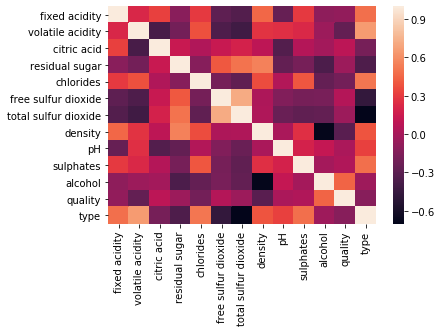

In [11]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

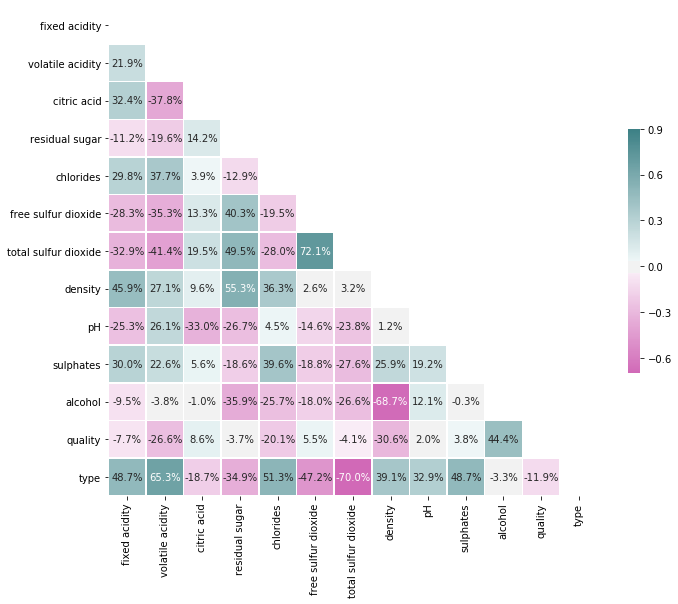

In [12]:
#Visualize correlation via heatmap
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
corr = wines.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(325, 200, as_cmap=True)
sns.heatmap(corr,annot=True, 
            fmt='.1%',
            mask=mask,
            cmap=cmap,
            vmax=.9,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5});

In [13]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.ix[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [21]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W0826 21:12:08.280585 10872 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0826 21:12:08.310494 10872 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 21:12:08.316477 10872 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [22]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

W0826 21:12:08.403246 10872 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0826 21:12:08.404242 10872 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[-0.19060043,  0.17801589, -0.18978003, -0.28220555, -0.49878642,
          0.05122256, -0.49236143,  0.05097038,  0.5011658 , -0.4807098 ,
         -0.22601587,  0.21335864],
        [-0.2703597 ,  0.45018882, -0.15848139,  0.0513261 , -0.23879024,
          0.46604174,  0.16846824,  0.20204794,  0.37535113,  0.22323543,
         -0.23025978, -0.40545297],
        [ 0.47965986, -0.37105203, -0.35324186, -0.01150951,  0.2260161 ,
         -0.36801282, -0.31146243, -0.00354701,  0.2970475 , -0.26547807,
          0.08011425, -0.36177912],
        [ 0.35586888, -0.11846489,  0.12843704, -0.20161176, -0.04001236,
         -0.36653814,  0.13331681,  0.01516622,  0.44258976,  0.444638  ,
          0.32625192, -0.44097167],
        [-0.03021938,  0.1998725 , -0.00313288, -0.38408154,  0.06143469,
          0.2293644 , -0.40151715, -0.46913075,  0.16867977, -0.12820455,
         -0.49398893, -0.3462333 ],
        [-0.2736084 , -0.19304869, -0.02968648, -0.34774685, -0.4222757 ,
      

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

W0826 21:12:08.504974 10872 deprecation_wrapper.py:119] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0826 21:12:08.553848 10872 deprecation.py:323] From C:\Users\lasha\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
4872/4872 [==============================] - 10s 2ms/step - loss: 0.0596 - acc: 0.9887
Epoch 2/20
4872/4872 [==============================] - ETA: 0s - loss: 0.0267 - acc: 0.994 - 7s 1ms/step - loss: 0.0266 - acc: 0.9945
Epoch 3/20
4872/4872 [==============================] - 8s 2ms/step - loss: 0.0205 - acc: 0.9955
Epoch 4/20
4872/4872 [==============================] - 7s 2ms/step - loss: 0.0194 - acc: 0.9963
Epoch 5/20
4872/4872 [==============================] - 7s 1ms/step - loss: 0.0180 - acc: 0.9963
Epoch 6/20
4872/4872 [==============================] - 7s 1ms/step - loss: 0.0167 - acc: 0.9965
Epoch 7/20
4872/4872 [==============================] - 8s 2ms/step - loss: 0.0188 - acc: 0.9961
Epoch 8/20
4872/4872 [==============================] - 7s 1ms/step - loss: 0.0149 - acc: 0.9969
Epoch 9/20
4872/4872 [==============================] - 6s 1ms/step - loss: 0.0155 - acc: 0.9967
Epoch 10/20
4872/4872 [==============================] - 7s 1ms/step - loss: 0.0142 - ac

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_test[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [26]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

1625/1625 [==============================] - 0s 38us/step
[0.022452732348850427, 0.9944615384615385]


In [37]:
# Isolate target labels
y = wines.quality

# Isolate data
X = wines.drop('quality', axis=1) 

In [38]:
# Scale the data with `StandardScaler`
X = StandardScaler().fit_transform(X)

In [39]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input layer 
model.add(Dense(64, input_dim=12, activation='relu'))
    
# Add output layer 
model.add(Dense(1))

In [42]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.fit(X[train], y[train], epochs=10, verbose=1)

Epoch 1/10
5195/5195 [==============================] - 0s 74us/step - loss: 14.2576 - mean_absolute_error: 3.3457
Epoch 2/10
5195/5195 [==============================] - 0s 37us/step - loss: 1.6629 - mean_absolute_error: 1.0018
Epoch 3/10
5195/5195 [==============================] - 0s 53us/step - loss: 1.0362 - mean_absolute_error: 0.7853
Epoch 4/10
5195/5195 [==============================] - 0s 42us/step - loss: 0.7782 - mean_absolute_error: 0.6787
Epoch 5/10
5195/5195 [==============================] - 0s 37us/step - loss: 0.6443 - mean_absolute_error: 0.6187
Epoch 6/10
5195/5195 [==============================] - 0s 38us/step - loss: 0.5852 - mean_absolute_error: 0.5913
Epoch 7/10
5195/5195 [==============================] - 0s 36us/step - loss: 0.5511 - mean_absolute_error: 0.5773
Epoch 8/10
5195/5195 [==============================] - 0s 42us/step - loss: 0.5263 - mean_absolute_error: 0.5649
Epoch 9/10
5195/5195 [==============================] - 0s 46us/step - loss: 0.5128 - m

In [44]:
mse_value, mae_value = model.evaluate(X[test], y[test], verbose=0)

print(mse_value)

0.4864626547282902


In [45]:
print(mae_value)

0.5482290507557765


In [57]:
#Adding another layer
model = Sequential()
model.add(Dense(64, input_dim=12, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))


In [58]:
model = Sequential()
model.add(Dense(128, input_dim=12, activation='relu'))
model.add(Dense(1))

In [59]:
from keras.optimizers import RMSprop
rmsprop = RMSprop(lr=0.0001)
model.compile(optimizer=rmsprop, loss='mse', metrics=['mae'])

In [60]:
from keras.optimizers import SGD, RMSprop
sgd=SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['mae'])